In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
pip install tensorflow pillow

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

In [ ]:
train_directory = '/content/drive/MyDrive/model2'
validation_directory = '/content/drive/MyDrive/model2'

In [ ]:
# Load training images
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Use this subset for training
)

Found 966 images belonging to 4 classes.


In [ ]:
# Load validation images
validation_generator = train_datagen.flow_from_directory(
    validation_directory,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use this subset for validation
)

Found 239 images belonging to 4 classes.


In [ ]:
from tensorflow.keras import layers, models

# Define the CNN architecture
model = models.Sequential([
    # 1st Convolutional Layer
    #filters, kernel_size
    #input_shape=(128, 128, 3): Specifies the input size.
    #The images are 128x128 pixels with 3 color channels (RGB).
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),

    # 2nd Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # 3rd Convolutional Layer
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Flatten the output from convolutional layers before feeding to Dense layers
    layers.Flatten(),

    # Fully connected layer with dropout for regularization
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # To prevent overfitting

    # Output layer with softmax activation for multi-class classification
    layers.Dense(train_generator.num_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Since this is a multi-class classification problem
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.5987 - loss: 1.0698 - val_accuracy: 0.5848 - val_loss: 1.0444
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5312 - loss: 1.2116 - val_accuracy: 0.6667 - val_loss: 1.0301
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.5850 - loss: 1.0567 - val_accuracy: 0.6473 - val_loss: 0.9286
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 336ms/step - accuracy: 0.5625 - loss: 0.9917 - val_accuracy: 0.5333 - val_loss: 1.2228
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.6177 - loss: 0.9899 - val_accuracy: 0.6205 - val_loss: 0.9066
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 347ms/step - accuracy: 0.8125 - loss: 0.8526 - val_accuracy: 0.6000 - val_loss: 0.9275
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.6225 - loss: 0.9611 - val_accuracy: 0.6786 - val_loss: 0.9253
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 341ms/step - accuracy: 0.5625 - loss: 1.1134 - val_accuracy: 0.4667 - 

In [ ]:
# Evaluattion
val_loss, val_acc = model.evaluate(validation_generator)
print(f'Validation Accuracy: {val_acc * 100:.2f}%')

8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7087 - loss: 0.7889
Validation Accuracy: 68.62%


In [ ]:
model.save('SIH_model2.h5')

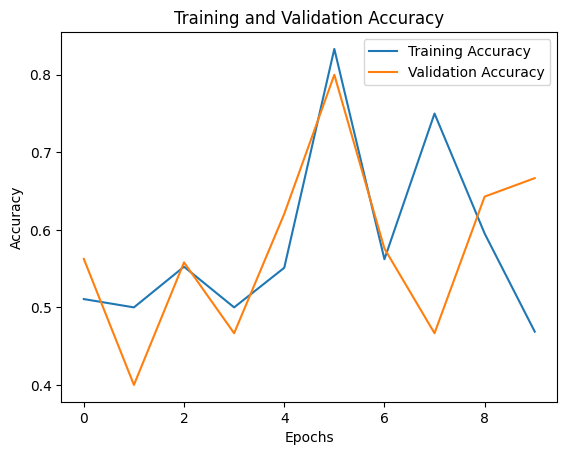

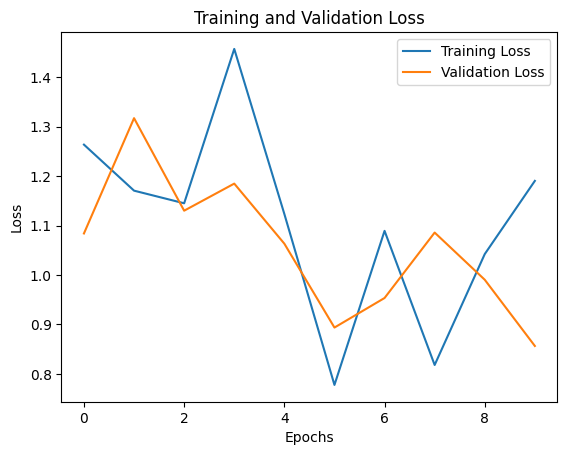

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()